# **Import dataset Labeled Faces in the Wild**
a dataset containing thousands of faces of public figures 
Note: images data must had same dimension each other, in this case is 62x47 pixels

In [10]:
# import dataset Labeled Faces in the Wild (LFW)
from sklearn.datasets import fetch_lfw_people
# load the dataset with minumum 60 images per person
faces = fetch_lfw_people(min_faces_per_person=60)
# print the information of the dataset
# target_names = name of the person
print(f'person names: {faces.target_names}')
# number of classes
print(f'number of classes or person: {len(faces.target_names)}')
# number of images and size of the image
# 1348 images with size 62x47 pixels
print(f'data shape: {faces.images.shape}')

person names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
number of classes or person: 8
data shape: (1348, 62, 47)


# **Show some images from the dataset**

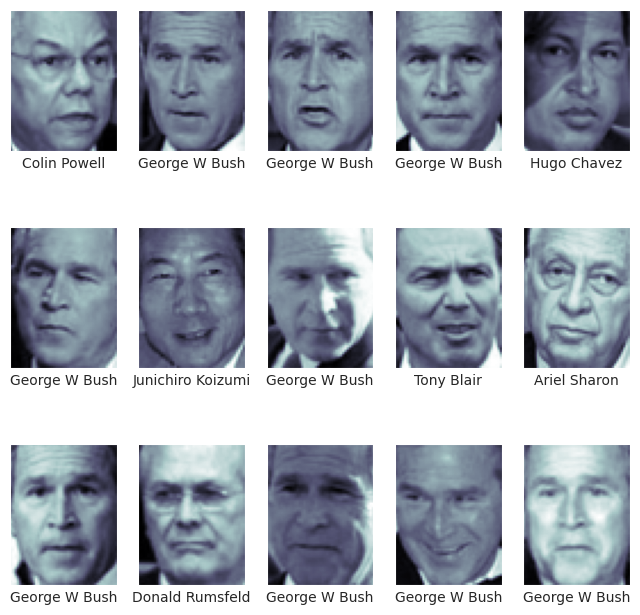

In [11]:
# show 15 images from the dataset
import matplotlib.pyplot as plt
# show 15 images with 3 rows and 5 columns
fig, ax = plt.subplots(3, 5, figsize=(8, 8))
# loop for each image and show the image
# 'i' is for the index of the image
# and axi is the axis of the image
# ax.flat is a 1D iterator over the subplots
# so we can have 'i' and axi from the loop
for i, axi in enumerate(ax.flat):
    # faces.images is a 3D array with shape (1348, 62, 47)
    # faces.images[i] is the i-th image
    axi.imshow(faces.images[i], cmap='bone')
    # xticks and yticks are the ticks on x and y-axis
    # ticks means the value of the axis
    # why we pass [] to xticks and yticks?
    # because we don't want to show the value of the axis
    # faces.target is the label of the images
    # faces.target_names is the name of the label
    # faces.target[i] is the label of the i-th image
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# **Feature Engineering**
Using svc for classification in image, why use svc? because svc is a good classifier for image classification. But, the problem is the dimensionality of the data is too high, so we need to reduce the dimensionality of the data. In this case PCA is used

PCA is used to reduce the dimensionality of the data, this is useful for reduce the computational cost and also reduce the overfitting. In this case, we use PCA to reduce the dimensionality of the data from 2914 to 150, 2914 is dimension from each pixel in image, in case our data 62 X 47 = 2914.

Pipeline is used to combine the PCA and SVC, this is userful for hide the intermediate steps.In this case, we use make_pipeline to combine PCA and SVC, what's means combine? it means that the output of PCA will be the input of SVC.

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# reduce the dimensionality of the data from 2914 to 150
# whiten=True means normalize the data
# random_state=42 means the random state
# why 42? because 42 is theory the answer of everything(jokes in statistic)
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# use svc for classification
# kernel='rbf' means the kernel of the svc is radial base function
# class_weight='balanced' means the class weight is balanced
# weight in this case is the weight of the class in the dataset
# if the class is imbalance, we can use class_weight='balanced'
# because the class_weight='balanced' will give the weight of the class
# based on the number of the class in the dataset 
svc = SVC(kernel='rbf', class_weight='balanced')
# combine PCA and SVC
# the output of PCA will be the input of SVC
model = make_pipeline(pca, svc)

# **Split the data into training and testing**

In [13]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# **Search best params C and gamma**
- What is C?
    - Definition:
    The C parameter is a regularization parameter. It determines the penalty for misclassified samples in the training set.
    - Effect on Model Behavior:
        - High C Value:
        A high value of C emphasizes minimizing the classification error on the training data. This means the model will try to classify all training examples correctly, potentially leading to a more complex decision boundary.
        This can increase the risk of overfitting, as the model may capture noise in the training data.
        - Low C Value:
        A low value of C allows some misclassification of training samples. The model will prioritize maximizing the margin between classes instead of fitting the training data perfectly.
        This can lead to a simpler model that generalizes better to unseen data, but it may underfit if C is too low.
    - Hyperparameter Tuning:
    Similar to gamma, finding the optimal C is crucial for model performance and is typically done using techniques like cross-validation.
    A grid search (e.g., GridSearchCV) is often employed to explore a range of C values.
    - Typical Values:
    Common values for C can range from very small (e.g., 0.01) to very large (e.g., 1000), depending on the dataset and problem complexity.
- What is gamma?
    - Definition:
    The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.
    It is a parameter for the RBF kernel (and other kernels like polynomial) used in the SVM algorithm.
    - Effect on Decision Boundary:
        - Low gamma: A low value means that the model will have a smoother decision boundary. Each training example has a broader influence, leading to a more generalized model. This can help avoid overfitting.
        - High gamma: A high value causes the model to fit the training data very closely, leading to a more complex decision boundary. This can lead to overfitting, as the model may capture noise in the training data.
    - Hyperparameter Tuning:
    Choosing the right value for gamma is essential for optimizing your SVM model. It is usually done through techniques like cross-validation.
    Common practice is to use a grid search (e.g., GridSearchCV) to find the optimal gamma along with other hyperparameters.
    - Typical Values:
    gamma can take various values:
    Small values (e.g., 0.001, 0.01) generally lead to more generalized models.
    Larger values (e.g., 1, 10) may lead to more complex models that can overfit.

In [14]:
# use grid search to search the best params C and gamma
from sklearn.model_selection import GridSearchCV
# param_grid is the grid of the params
# svc__C means the C in the svc
# svc__gamma means the gamma in the svc
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2.71 s, sys: 252 ms, total: 2.96 s
Wall time: 9.64 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


# **Predict the data**

In [15]:
# apply grid.best_estimator_ to the model
# grid.best_estimator_ is the best model from the grid search
# also before we search with GridSearchCV, model is pipeline of PCA and SVC
# so the best model from the grid search is also pipeline of PCA and SVC
model = grid.best_estimator_
yfit = model.predict(Xtest)
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))])


# **Show the result**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

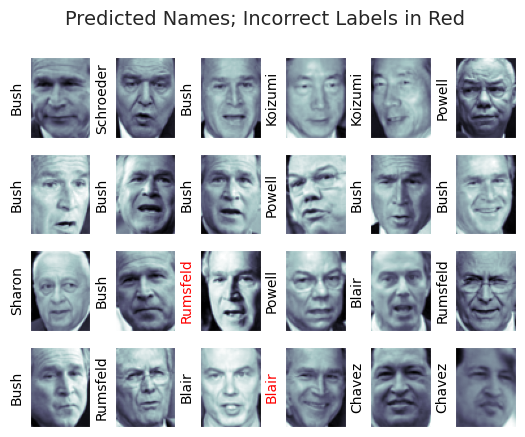

In [16]:
# create the plot for the result
# 4 rows and 6 columns
fig, ax = plt.subplots(4, 6)
# loop for each image
# 'i' is the index of the image
# axi is the axis of the image
# ax.flat is a 1D iterator over the subplots
# so we can have 'i' and axi from the loop
for i, axi in enumerate(ax.flat):
    # show the image
    # Xtest[i] is the i-th image
    # Xtest[i].reshape(62, 47) is the reshape of the i-th image
    # why we use reshape(62, 47)?
    # because the original shape of the image is 62x47 pixels
    # so we need to reshape the image to the original shape
    # cmap='bone' means the color map of the
    # image is bone, bone is a colormap for matplotlib 
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    # xticks and yticks are the ticks on x and y-axis
    # ticks means the value of the axis
    # why we pass [] to xticks and yticks?
    # because we don't want to show the value of the axis
    axi.set(xticks=[], yticks=[])
    # set the title of the image with the predicted label
    # yfit[i] is the predicted label of the i-th image
    # ytest[i] is the true label of the i-th image
    # faces.target_names is the name of the label
    # faces.target_names[yfit[i]] is the name of the predicted label
    # faces.target_names[ytest[i]] is the name of the true label
    # faces.target_names[yfit[i]].split()[-1] is the last name of the predicted label
    # why we use split()[-1]?
    # because the name of the label is 'Firstname Lastname'
    # so we need to split the name and get the last name 
    # why we use [-1]?
    # because the last name is the last element of the list
    # color='black' if yfit[i] == ytest[i] else 'red'
    # if the predicted label is the same as the true label
    # the color of the title is black
    # if the predicted label is different from the true label
    # the color of the title is red
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

# **Show the classification report**
classification report will show the precision, recall, f1-score, and support
here explanation of the classification report:
- **precision** = **TP / (TP + FP)** where TP is the number of true positives and FP the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative or Precision is defined as the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). The best value is 1 and the worst value is 0.
Interpretation of Precision
    - High Precision: Indicates that a high proportion of predicted positive instances are actually positive. This is important in scenarios where false positives are costly or undesirable (e.g., spam detection).
    - Low Precision: Suggests that a significant number of predicted positive instances are false positives, indicating that the model is not accurately identifying the positive class.
- **recall** = **TP / (TP + FN)** where TP is the number of true positives and FN the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples or Recall, also known as sensitivity or true positive rate, measures the ability of a model to identify all relevant instances in the dataset. It is the ratio of true positive predictions to the actual positive instances. The best value is 1 and the worst value is 0.Interpretation
    - High Recall: Indicates that the model is good at capturing positive instances, which is especially important in scenarios where missing a positive instance is costly (e.g., disease detection).
    - Low Recall: Suggests that a significant number of positive instances are missed.
- **f1-score** = **2 * ((precision * recall) / (precision + recall))** where the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0, The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics, especially useful when you need to take both false positives and false negatives into account.Interpretation
    - High F1-Score: Indicates a good balance between precision and recall, meaning the model is both accurate in its positive predictions and good at capturing actual positives.
    - Low F1-Score: Suggests that either precision or recall (or both) is low, indicating potential issues in classification performance.
- **support** = the number of occurrences of each class in y_true. Support refers to the number of actual occurrences of each class in the dataset. It is an important metric because it provides context for the precision and recall values. Interpretation
    - High Support: Indicates that there are many instances of a particular class, which can make performance metrics more reliable.
    - Low Support: Suggests that there are few instances of that class, and metrics may be less reliable or more sensitive to fluctuations.
- **accuracy** = **(TP + TN) / (TP + TN + FP + FN)** where TP is the number of true positives, TN the number of true negatives, FP the number of false positives, and FN the number of false negatives. Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. It is a common evaluation metric but can be misleading when classes are imbalanced. Interpretation:
    - High Accuracy: Indicates that the model is making correct predictions. However, accuracy alone may not provide a complete picture of model performance, especially if the classes are imbalanced.
    - Low Accuracy: Suggests that the model is not making correct predictions, but this could be due to various factors like class imbalance or misinterpretation of the problem.
- **macro avg** = **(precision + recall + f1-score) / 3** where macro avg is the average of precision, recall, and f1-score between classes. It gives equal weight to each class, regardless of class imbalance. Interpretation:
    - High Macro Avg: Indicates that the model is performing well across all classes. This is useful when you want to know how well the model is doing overall, without considering class imbalance.
    - Low Macro Avg: Suggests that the model is not performing well on average across classes, which could be due to issues like class imbalance or misclassification.
- **weighted avg** = **Weighted Average= sum((matrix-i to matrix-n) x Support-i)) / sum(support-i to support-n)** Where:
Metric can be precision, recall, or F1-score for each class.
Support: The number of true instances for each class.
weighted avg is the weighted average of precision, recall, and f1-score. It gives more weight to classes with higher support (i.e., more instances). Interpretation:
    - High Weighted Avg: Indicates that the model is performing well on average, with more weight given to classes with higher support. This is useful when you want to know how well the model is doing overall, considering class imbalance.
    - Low Weighted Avg: Suggests that the model is not performing well on average, especially for classes with higher support.
- **Note**: class imbalance can affect the evaluation metrics, especially accuracy. In imbalanced datasets, metrics like precision, recall, F1-score, and support can provide more insights into model performance.Imbalanced dataset is a dataset where the number of instances in each class is significantly different. For example, a dataset with 90% positive instances and 10% negative instances is imbalanced. In such cases, evaluation metrics like accuracy can be misleading, as a model can achieve high accuracy by predicting the majority class.where you are classifying images based on their names (which also serve as labels), you can define the terms True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) as follows:
    - True Positives (TP):
        - These are the images that were correctly classified as belonging to a specific class (the predicted label matches the actual label).
        - For example, if an image with the name "cat.jpg" is correctly classified as "cat," it counts as a TP for the "cat" class.
    - True Negatives (TN):
        - These are the images that were correctly classified as not belonging to a specific class.
        - For instance, if "dog.jpg" is correctly classified as not being a "cat," that counts as a TN for the "cat" class.
    - False Positives (FP):
        - These are the images that were incorrectly classified as belonging to a specific class when they do not.
        - For example, if an image named "dog.jpg" is incorrectly classified as "cat," it counts as an FP for the "cat" class.
    - False Negatives (FN):
        - These are the images that were incorrectly classified as not belonging to a specific class when they actually do.
        - For instance, if an image named "cat.jpg" is incorrectly classified as "dog," that counts as an FN for the "cat" class.

In [17]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



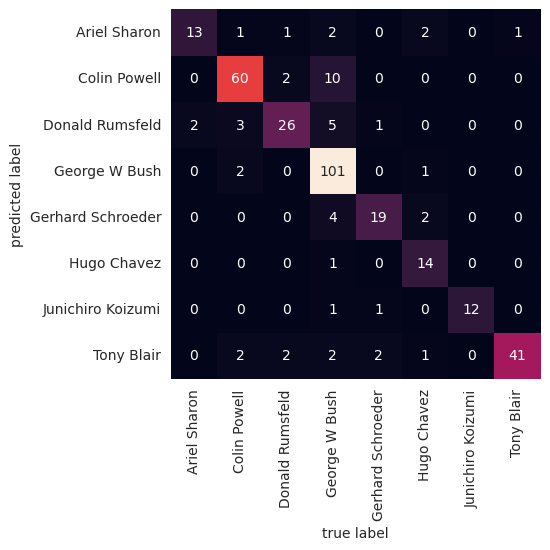

Class                TP         TN         FP         FN        
---------------------------------------------------------
Ariel Sharon         13         315        7          2         
Colin Powell         60         257        12         8         
Donald Rumsfeld      26         295        11         5         
George W Bush        101        208        3          25        
Gerhard Schroeder    19         308        6          4         
Hugo Chavez          14         316        1          6         
Junichiro Koizumi    12         323        2          0         
Tony Blair           41         286        9          1         
---------------------------------------------------------
Total                286        2308       51         51        


In [18]:
# bentuk confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# show the confusion matrix in text for comparison
# Prepare to store TP, TN, FP, FN
results = []
# Calculate TP, TN, FP, FN for each class
for i, label in enumerate(faces.target_names):
    TP = mat[i, i]  # True Positives
    TN = mat.sum() - (mat[i, :].sum() + mat[:, i].sum() - TP)  # True Negatives
    FP = mat[:, i].sum() - TP  # False Positives
    FN = mat[i, :].sum() - TP  # False Negatives
    results.append((label, TP, TN, FP, FN))
# print header
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Class", "TP", "TN", "FP", "FN"))
print("-" * 57)

# Initialize totals
total_TP = total_TN = total_FP = total_FN = 0
# print results
for label, TP, TN, FP, FN in results:
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(label, TP, TN, FP, FN))
    total_TP += TP
    total_TN += TN
    total_FP += FP
    total_FN += FN
# Print totals
print("-" * 57)
print(f"{'Total':<20} {total_TP:<10} {total_TN:<10} {total_FP:<10} {total_FN:<10}")